In [1]:
#Installing Packages
using Pkg
Pkg.add("InteractiveDynamics")
Pkg.add("DynamicalSystems")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
#Importing Libraries
using InteractiveDynamics, DynamicalSystems, DifferentialEquations, Plots

# The Lorenz Differential Equations
The Lorenz system is a system of ordinary differential equations first studied by mathematician and meteorologist Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system.

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

In [3]:
#Defining the Lorenz Differential Equations
function lorentz!(du,u,p,t)
    x,y,z = u
    sigma,rho,beta = p
    
    du[1] = sigma*(y - x)
    du[2] = rho*x - y - x*z
    du[3] = x*y - beta*z
    
    return nothing
end

lorentz! (generic function with 1 method)

In [14]:
initial = [1.0, 1.0, 1.0] #Initial Conditions
parameters = [10.0, 28.0, 8/3] #value of sigma, rho and beta
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(lorentz!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1264-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262398390028978
   0.009058060149574726
   0.016956449405371755
   0.02768993058405869
   0.04185631256995427
   0.060240359409912465
   0.0836853459014633
   0.11336490912114593
   0.1486217173729216
   0.18703967196961463
   ⋮
  98.99459287053229
  99.0898561618104
  99.18516855260675
  99.2858697333858
  99.38350446911585
  99.46865611105598
  99.56122065843316
  99.64618558376807
  99.74364956975944
  99.83798930278873
  99.94106524965552
 100.0
u: 1264-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849054, 1.7814347887992044e-8]
 [0.9961045497425811, 0.01096539972124245, 2.1469553658389054e-6]
 [0.9693592457883459, 0.08977035335005876, 0.00014380102292713885]
 [0.9242044671035574, 0.24228872786108774, 0.001046158

# Taken's Theorem (1981)

Using the Taken's Theorem we can embed the time series we have available into a phase space where we do not have a temporal dependence between our data points anymore. This is important because the Statistical Learning Theory only guarantees the learning of an algorithm if the samples (rows or data instances) of our dataset are independent from each other.

In order to define this embedding, we need two hyperparameters named d and m which are the time delay and the embedding dimension respectively. The time delay defines how many data points, previously to the actual one, we will use on the embedding. The dimension will define the final shape of our dataset and how many axies there are in the phase space, each axis representing a time delay.

With those two parameters, given a time series $f(t)$, we will have its embedding as:

$$
\begin{matrix}
f(t) & f(t + d) & \dots & f(t + (m-1)d)\\
f(t+1) & f(t + d + 1) & \dots & f(t + (m-1)d + 1)\\
f(t+2) & f(t + d + 2) & \dots & f(t + (m-1)d) + 2)\\
\dots & \dots & \dots & \\
f(t+(m-1)) & f(t + d + (m -1)) & \dots &  f(t + (m-1)d + (m-1))
\end{matrix}
$$

The idea is that if the series is deterministic enough, then this embedding will generate an attractor on the phase space and we will able to forecast the time series.

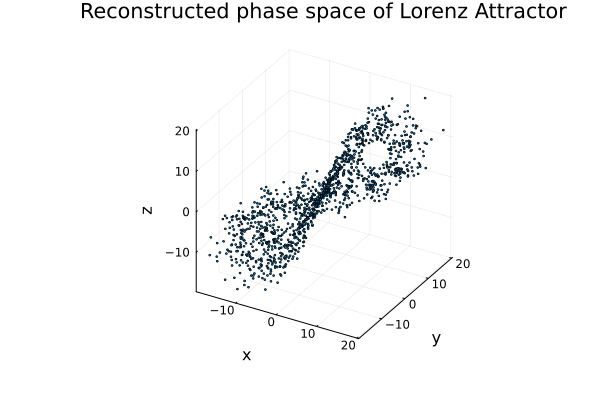

In [43]:
# Extract time series of x variable
x = sol[1,:]

# Embedding parameters
m = 3   # embedding dimension
τ = 1   # time delay

N = length(x) - (m-1)*τ
X = zeros(m, N)
for i in 1:N
    for j in 1:m
        X[j,i] = x[i + (j-1)*τ]
    end
end

# Scatter Plot reconstructed phase space
scatter(X[1,:], X[2,:], X[3,:], markersize=1, xlabel="x", ylabel="y", zlabel="z", legend=false,title="Reconstructed phase space of Lorenz Attractor")

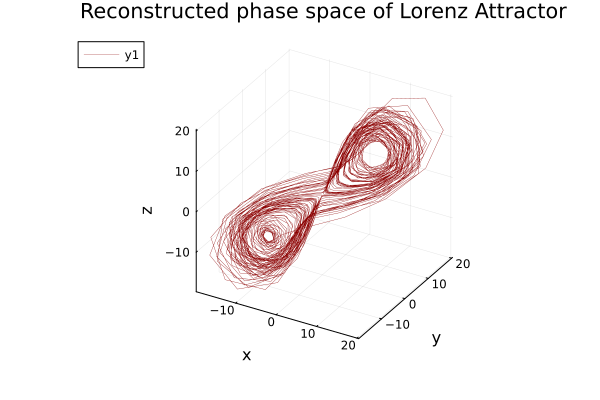

In [39]:
# Line Plot reconstructed phase space
plot(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues,title="Reconstructed phase space of Lorenz Attractor")

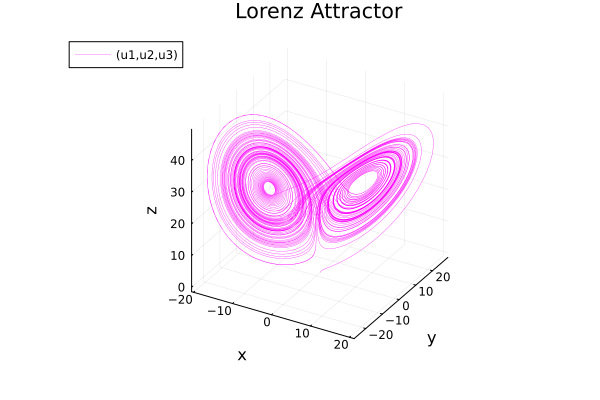

In [40]:
#Lorenz Attractor
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring,title="Lorenz Attractor")

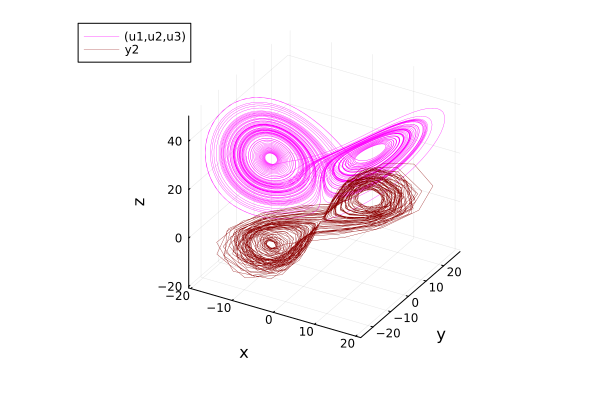

In [42]:
#On the same Plot
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring)
plot!(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues)

# The Rossler Differential Equations
The Rössler attractor is the attractor for the Rössler system, a system of three non-linear ordinary differential equations originally studied by Otto Rössler in the 1970s.These differential equations define a continuous-time dynamical system that exhibits chaotic dynamics associated with the fractal properties of the attractor.

$$
\begin{aligned}
\dot{x} & = - y - z\\
\dot{y} & = x + ay\\
\dot{z} & = b + z(x-c)\\
\end{aligned}
$$

In [44]:
#Defining the Rossler Differential Equations
function rossler!(du,u,p,t)
    x,y,z = u
    a,b,c = p
    
    du[1] = -y - z
    du[2] = x + a*y
    du[3] = b + z*(x-c)
    return nothing
end

rossler! (generic function with 1 method)

In [46]:
initial = [1.0,1.0,1.0] #Initial Conditions
parameters = [0.2,0.2,5.7] #Value of a,b and c
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(rossler!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 383-element Vector{Float64}:
   0.0
   0.061603477503225555
   0.13821833464070965
   0.22922647488340114
   0.33276196806396785
   0.44717266351654633
   0.5707477079603281
   0.7024714414462374
   0.8422140933544835
   0.9913931123387644
   1.1523925215801125
   1.3290905735222311
   1.5263828150866288
   ⋮
  96.69693434047964
  96.88188964501325
  97.10243391538145
  97.37600644052728
  97.73641943078479
  98.04660613762528
  98.37807280377949
  98.74853853551026
  99.16104641250936
  99.54689492867732
  99.98319446054667
 100.0
u: 383-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [0.8824156611718554, 1.0706898174885333, 0.7565358121033396]
 [0.7483732102038639, 1.1501171087221853, 0.5330923791600904]
 [0.6001427658757752, 1.2331202281115623, 0.3519825076263367]
 [0.4390454205983956, 1.313262415358709, 0.22186222729005484]
 [0.264455039442519

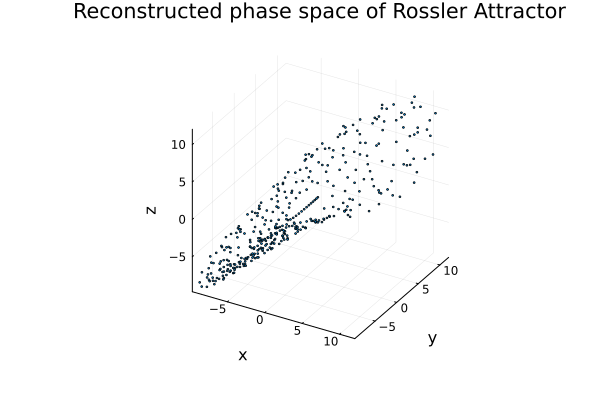

In [50]:
# Extract time series of x variable
x = sol[1,:]

# Embedding parameters
m = 3   # embedding dimension
τ = 1   # time delay

N = length(x) - (m-1)*τ
X = zeros(m, N)
for i in 1:N
    for j in 1:m
        X[j,i] = x[i + (j-1)*τ]
    end
end

# Scatter Plot reconstructed phase space
scatter(X[1,:], X[2,:], X[3,:], markersize=1, xlabel="x", ylabel="y", zlabel="z", legend=false,title="Reconstructed phase space of Rossler Attractor")

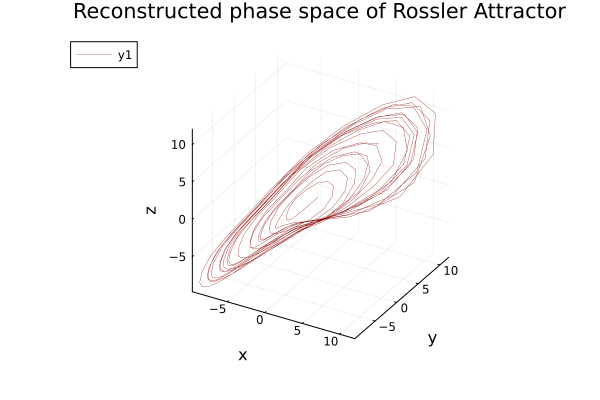

In [51]:
# Line Plot reconstructed phase space
plot(X[1,:],X[2,:],X[3,:],xlabel="x",ylabel="y",zlabel="z",lw=0.3, color=:redsblues,title="Reconstructed phase space of Rossler Attractor")

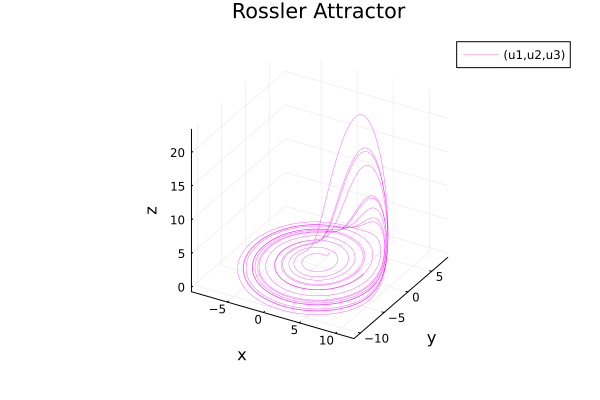

In [52]:
#Lorenz Attractor
plot(sol,idxs=(1,2,3),xlabel="x",ylabel="y",zlabel="z",lw=0.3,color=:spring,title="Rossler Attractor")